# Concrete Label 분류 알고리즘 (Classification)

* Concrete의 배합 성분 및 함량을 기반으로 Concrete의 label을 분류하는 알고리즘 구현

### 1) 라이브러리 import

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2) 데이터 불러오기

In [2]:
concrete = pd.read_excel('Concrete_Data.xls')
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### 3) EDA

In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

* 총 9개의 컬럼으로 구성되어 있으며, null 데이터가 없이 총 각 컬럼당 1030개의 데이터로 구성되어 있음.
    - 컬럼명을 단위를 제외한 간단한 이름으로 변경 필요
* Concrete compressive strength가 target label이고, 나머지 8개는 feature 값임. 
    - 분류 문제를 풀기 위해서 Concrete compressive strength를 카테고리화 시킬 것임.

In [4]:
# 컬럼 이름 변경
column_name = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 
               'Fine Aggregate', 'Age', 'Concrete compressive strength']
concrete.columns = column_name

In [5]:
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


* 각 컬럼(feature)별 데이터 스케일의 차이가 있기 때문에 normailize를 해야할 것으로 보임.

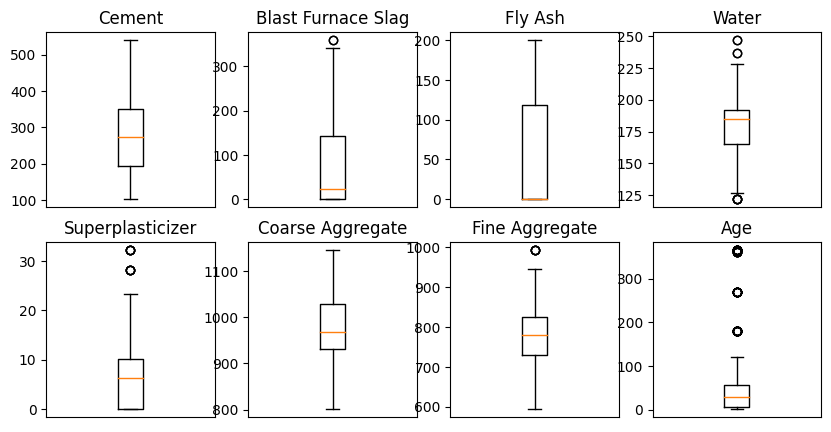

In [6]:
# 각 feature값들의 outlier 확인과 분포를 확인하기 위한 boxplot

plt.figure(figsize =(10,5))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.boxplot(concrete.iloc[:,i])
    plt.xticks([])
    plt.title(column_name[i])

* Cement, concrete aggregat는 outlier가 확인되지 않음.
* Blast Furnace Slag, Fly Ash의 경우 중앙값과 1분위수 내 데이터들에 비해 중앙값과 3분위수 내 데이터들이 매우 넓은 범위에 퍼져있음을 확인할 수 있다.
* Age의 경우 outlier가 매우 넓은 간격으로 퍼져있음을 확인할 수 있음.
    - 일반적으로 outlier를 제거하는 것이 모델의 성능을 올릴 수 있으나, target label인 strength와의 영향도를 판단하고 이상치 제거를 결정하고자 한다.

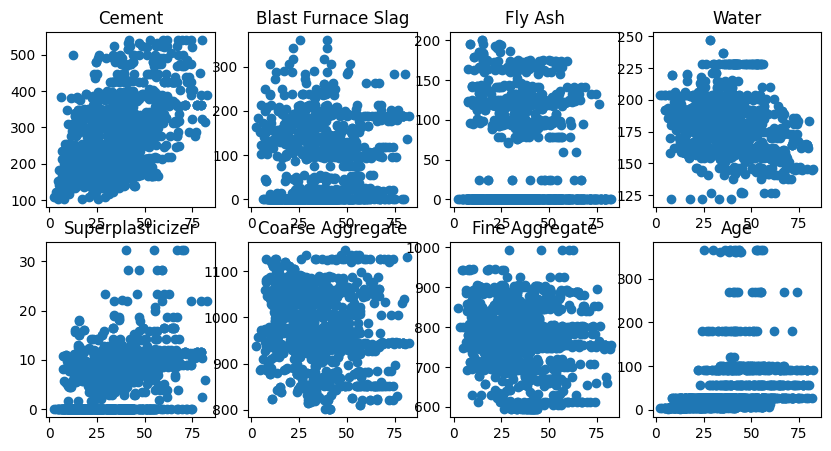

In [7]:
plt.figure(figsize =(10,5))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.scatter(concrete.iloc[:,-1], concrete.iloc[:,i])
    plt.title(column_name[i])

In [8]:
concrete.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete compressive strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


* Cement와 strength 간 약한 양의 상관 관계를 보임.
* Superplasticizer와 Age와는 그 다음의 양의 상관 관계를 보임.
* water와는 약한 음의 상관 관계를 보임.
* 하지만 상관계수 값이 0.6 이상을 갖는 feature는 없음.

In [9]:
# 각각 feature의 outlier처리 후, strength와의 상관 관계 확인
# outlier 처리 (IQR 사용)
q1 = concrete.iloc[:,:-1].describe().loc['25%']
q3 = concrete.iloc[:,:-1].describe().loc['75%']
iqr = q3 - q1
lowerB = q1 - 1.5 * iqr
upperB = q3 + 1.5 * iqr
concrete_label = concrete.iloc[:,:-1]

concrete2 = pd.DataFrame(np.where((concrete_label < lowerB), lowerB, np.where((concrete_label > upperB), upperB, concrete_label)),
                        columns = column_name[:-1])
concrete2['Concrete compressive strength'] = concrete.iloc[:,-1].values
concrete2.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,-0.275217,-0.397475,-0.081588,0.079708,-0.109356,-0.225313,0.054323,0.497833
Blast Furnace Slag,-0.275217,1.000000,-0.323580,0.107064,0.043887,-0.284023,-0.283254,-0.052704,0.134854
Fly Ash,-0.397475,-0.323580,1.000000,-0.258428,0.395515,-0.009977,0.080930,-0.092705,-0.105753
Water,-0.081588,0.107064,-0.258428,1.000000,-0.665254,-0.180260,-0.448966,0.189629,-0.291200
Superplasticizer,0.079708,0.043887,0.395515,-0.665254,1.000000,-0.261823,0.216675,-0.123050,0.366398
Coarse Aggregate,-0.109356,-0.284023,-0.009977,-0.180260,-0.261823,1.000000,-0.176567,0.012294,-0.164928
Fine Aggregate,-0.225313,-0.283254,0.080930,-0.448966,0.216675,-0.176567,1.000000,-0.096567,-0.169591
Age,0.054323,-0.052704,-0.092705,0.189629,-0.123050,0.012294,-0.096567,1.000000,0.469629
Concrete compressive strength,0.497833,0.134854,-0.105753,-0.291200,0.366398,-0.164928,-0.169591,0.469629,1.000000


In [10]:
# outlier 처리 전후의 상관계수 비교
print(concrete.corr().iloc[-1,:])
print(concrete2.corr().iloc[-1,:])

Cement                           0.497833
Blast Furnace Slag               0.134824
Fly Ash                         -0.105753
Water                           -0.289613
Superplasticizer                 0.366102
Coarse Aggregate                -0.164928
Fine Aggregate                  -0.167249
Age                              0.328877
Concrete compressive strength    1.000000
Name: Concrete compressive strength, dtype: float64
Cement                           0.497833
Blast Furnace Slag               0.134854
Fly Ash                         -0.105753
Water                           -0.291200
Superplasticizer                 0.366398
Coarse Aggregate                -0.164928
Fine Aggregate                  -0.169591
Age                              0.469629
Concrete compressive strength    1.000000
Name: Concrete compressive strength, dtype: float64


* 다른 feature들은 outlier의 수가 많지 않아 상관계수에는 큰 영향이 없지만, Age의 경우 outlier 처리 후 상관 계수가 소폭 상승한 것을 확인함.
    - outlier 처리한 데이터를 이용해서 모델 구현 진행 

(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33180783, 10.35854953, 18.38529123, 26.41203292, 34.43877462,
        42.46551632, 50.49225801, 58.51899971, 66.54574141, 74.5724831 ,
        82.5992248 ]),
 <BarContainer object of 10 artists>)

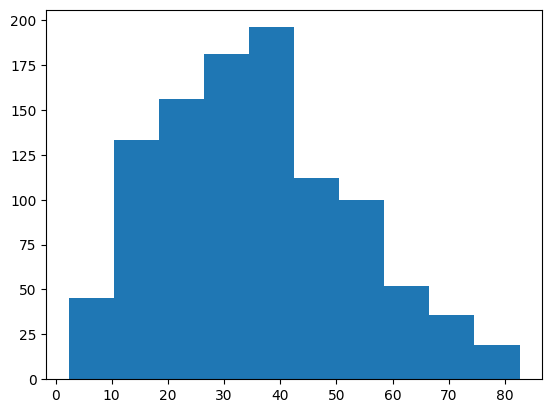

In [11]:
# Concrete compressive strength의 분포 확인
plt.hist(concrete.iloc[:,-1])

In [12]:
concrete.iloc[:,-1].describe()

count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: Concrete compressive strength, dtype: float64

* Strength값 분포는 최대값 82.6에서 최솟값 2.33에서의 분포를 가지고 있음.
* 중앙값이 평균값에 비해 약간 낮으며 히스토그램에서도 확인할 수 있듯이 왼쪽으로 조금 치우진 데이터 분포를 보임.

In [13]:
# 분류를 위해 label을 카테고리화 진행 (4개 계층)
names = ['weak', 'normal', 'strong', 'Very Strong']

concrete2['label'] = pd.cut(concrete2.iloc[:,-1], 4, labels = names)
concrete2.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,label
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111,Very Strong
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366,strong
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.269535,normal
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.052780,normal
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.296075,strong


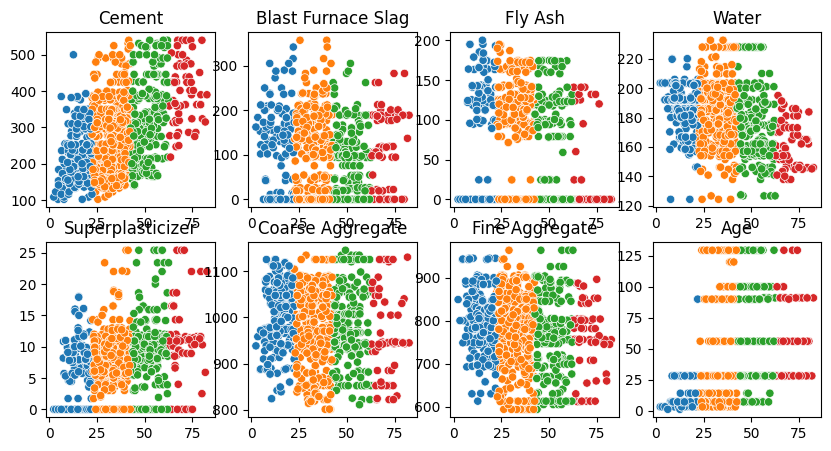

In [14]:
plt.figure(figsize =(10,5))

for i in range(8):
    plt.subplot(2,4,i+1)
    sns.scatterplot(x = column_name[-1], y = column_name[i], data = concrete2, hue = concrete2.label, legend=None)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(column_name[i])

* 4개의 카테고리로 분류함.
    - 일부 feature들은 label과의 상관관계가 보임.

### 4) 정규화

* feature의 값의 범위가 모두 다르게 형성되어 있음 -> 정규화 필요

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
concrete2_feature = concrete2.iloc[:,:-2]
print('정규화 전')
print(concrete2_feature.head())
print('정규화 후')
concrete2_feature_norm = pd.DataFrame(ss.fit_transform(concrete2_feature), columns = column_name[:-1])
print(concrete2_feature_norm.head())

정규화 전
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate    Age  
0            1040.0           676.0   28.0  
1            1055.0           676.0   28.0  
2             932.0           594.0  129.5  
3             932.0           594.0  129.5  
4             978.4           825.5  129.5  
정규화 후
     Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0  2.477918           -0.856970 -0.847132 -0.921150         -0.630864   
1  2.477918           -0.856970 -0.847132 -0.921150         -0.630864   
2  0.491443            0.795698 -0.847132  2.189796         -1.062193   
3  0.491443            

In [16]:
concrete2_feature_norm.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,-5.518779e-17,2.759389e-17,-3.035328e-16,5.518779e-17,2.276496e-16,3.449237e-17,-6.898473e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-8.569696e-01,-8.471320e-01,-2.700516e+00,-1.062193e+00,-2.212137e+00,-2.249273e+00,-1.036502e+00
25%,-8.500258e-01,-8.569696e-01,-8.471320e-01,-7.844565e-01,-1.062193e+00,-5.265140e-01,-5.325911e-01,-8.687398e-01
50%,-7.912996e-02,-6.018210e-01,-8.471320e-01,1.629677e-01,3.338321e-02,-6.328926e-02,7.611331e-02,-2.815719e-01
75%,6.589771e-01,8.009169e-01,1.001836e+00,4.929164e-01,6.907290e-01,7.267662e-01,6.337999e-01,5.013187e-01
max,2.477918e+00,3.287747e+00,2.281122e+00,2.408976e+00,3.320112e+00,2.214232e+00,2.383386e+00,2.556406e+00


* StandardScaler를 통해 모든 feature가 정규화가 되었음.

In [17]:
# 분류 모델에 적용할 데이터프레임 준비
concrete3 = pd.concat([concrete2_feature_norm, concrete2.iloc[:,-1]], axis = 1)
concrete3.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,label
0,2.477918,-0.856970,-0.847132,-0.921150,-0.630864,0.863160,-1.221395,-0.281572,Very Strong
1,2.477918,-0.856970,-0.847132,-0.921150,-0.630864,1.056170,-1.221395,-0.281572,strong
2,0.491443,0.795698,-0.847132,2.189796,-1.062193,-0.526514,-2.249273,2.556406,normal
3,0.491443,0.795698,-0.847132,2.189796,-1.062193,-0.526514,-2.249273,2.556406,normal
4,-0.790432,0.678561,-0.847132,0.492916,-1.062193,0.070531,0.652603,2.556406,strong


### 5) 분류 모델 구현

In [18]:
# 훈련셋, 테스트셋 분리
X = concrete3.iloc[:,:-1].values
y = concrete3.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (824, 8)
X_test shape: (206, 8)
y_train shape: (824,)
y_test shape: (206,)


In [43]:
model_name = []
model_score = []

#### 5-1) KNN 알고리즘

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
print(f'훈련셋 score: {knn.score(X_train, y_train)}')
print(f'시험셋 score: {knn.score(X_test, y_test)}')

훈련셋 score: 0.8252427184466019
시험셋 score: 0.7281553398058253


* 훈련셋의 score는 82.5, 시험셋의 scoresms 72.8로 시험셋의 예측이 훈련셋 예측 대비 조금 떨어짐.

In [44]:
model_name.append('kNN')
model_score.append(np.round(knn.score(X_test, y_test),2))

#### 5-2) NaiveBayes 알고리즘

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(f'훈련셋 score: {gnb.score(X_train, y_train)}')
print(f'시험셋 score: {gnb.score(X_test, y_test)}')

훈련셋 score: 0.5813106796116505
시험셋 score: 0.6213592233009708


* GaussinNB의 파라미터를 변경하지는 않았지만, 기본값으로 진행한 결과 kNN대비 score값이 낮게 나옴.

In [45]:
model_name.append('GaussianNB')
model_score.append(np.round(gnb.score(X_test, y_test),2))

#### 5-3) DecisionTree 알고리즘

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(f'훈련셋 score: {dt.score(X_train, y_train)}')
print(f'시험셋 score: {dt.score(X_test, y_test)}')

훈련셋 score: 0.9939320388349514
시험셋 score: 0.8252427184466019


* kNN대비 훈련셋과 시험셋의 score가 높게 나타났지만, 훈련셋의 score 대비 시험셋의 score가 낮은 것으로 보아 과적합 된 것으로 보임.
    - max_depth 인자를 조절해서 성능을 최적화하고자 함.

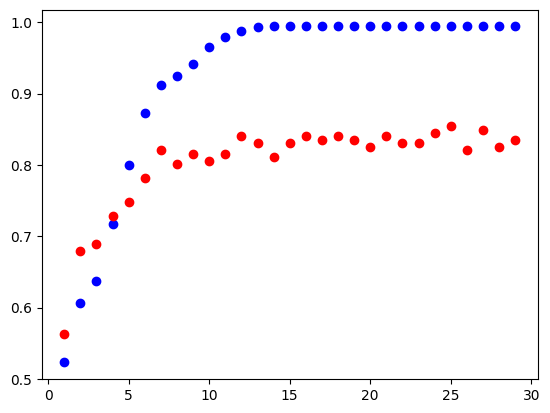

In [25]:
for n in range(1,30):
    dt_test = DecisionTreeClassifier(max_depth = n)
    dt_test.fit(X_train, y_train)
    plt.scatter(n,dt_test.score(X_train, y_train), color = 'b')
    plt.scatter(n,dt_test.score(X_test, y_test), color = 'r')

plt.show()

* 훈련셋의 score는 depth 12가 되는 시점에서 1에 수렴하지만, 시험셋의 score는 depth가 7인 지점에서 거의 수렴한 것으로 보임.
    - depth를 더욱 늘리면 시험셋에 대한 score를 0.85수준까지 높게 만들 수 있으나, 과적합에 대해서는 해결할 수 없음.
    - 모델의 한계로 보임.

In [46]:
model_name.append('DecisionTree')
model_score.append(np.round(dt.score(X_test, y_test),2))

#### 5-4) RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f'훈련셋 score: {rf.score(X_train, y_train)}')
print(f'시험셋 score: {rf.score(X_test, y_test)}')

훈련셋 score: 0.9939320388349514
시험셋 score: 0.8495145631067961


* RandomForest의 성능도 DecisionTree의 결과와 큰 차이를 보이지는 않음.

In [47]:
model_name.append('RandomForest')
model_score.append(np.round(rf.score(X_test, y_test),2))

#### 5-5) SVM

In [29]:
from sklearn.svm import SVC
sv = SVC(kernel = 'poly')
sv.fit(X_train, y_train)
print(f'훈련셋 score: {sv.score(X_train, y_train)}')
print(f'시험셋 score: {sv.score(X_test, y_test)}')

훈련셋 score: 0.7694174757281553
시험셋 score: 0.7475728155339806


* 훈련셋과 시험셋의 score는 동등 수준을 보이기 때문에 과적합 문제는 없어보이나, DecisionTree나 RandomForest 대비 성능은 낮음.

In [48]:
model_name.append('SVM')
model_score.append(np.round(sv.score(X_test, y_test),2))

#### 5-6) 결과 정리

In [51]:
result_dict = {'Model': model_name, 'Score': model_score}
result = pd.DataFrame(result_dict)
result

,Model,Score
0,kNN,0.73
1,GaussianNB,0.62
2,DecisionTree,0.83
3,RandomForest,0.85
4,SVM,0.75


* 5가지의 분류 모델을 적용한 결과, RandomForest에서 가장 높은 성능을 보임
    - 각 분류 모델의 파라미터를 최적화하는 과정을 거치지 않았기 때문에 파라미터 최적화 후에는 결과가 조금은 바뀔 수 있을 것으로 예상
* 하지만 score값이 0.9를 넘는 모델을 없었음. 이는 대부분의 feature들과 label간의 상관계수가 낮기 때문에 나타난 결과로 생각된다.
    - label과 상관계수가 높았던 일부 변수들만 뽑아서 모델을 구성하면 조금 더 높은 성능을 보이지 않을까라는 가정을 해봄.

In [67]:
# strength와의 상관계수
concrete2.iloc[:,:-1].corr().iloc[-1,:-1]

Cement                0.497833
Blast Furnace Slag    0.134854
Fly Ash              -0.105753
Water                -0.291200
Superplasticizer      0.366398
Coarse Aggregate     -0.164928
Fine Aggregate       -0.169591
Age                   0.469629
Name: Concrete compressive strength, dtype: float64

* 상관계수 값이 높은 Cement, Water, Superplasticizer, Age만을 이용해서 RandomForest 모델에 적용하여 성능을 확인해보고자 함.

In [71]:
concrete4 = concrete3.loc[:,['Cement', 'Water', 'Superplasticizer', 'Age', 'label']]

In [72]:
new_X = concrete4.iloc[:,:-1].values
new_y = concrete4.iloc[:,-1].values

In [73]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size = 0.2, random_state = 0)

In [77]:
from sklearn.ensemble import RandomForestClassifier
new_rf = RandomForestClassifier()
new_rf.fit(new_X_train, new_y_train)
print(f'훈련셋 score: {new_rf.score(new_X_train, new_y_train)}')
print(f'시험셋 score: {new_rf.score(new_X_test, new_y_test)}')

훈련셋 score: 0.9854368932038835
시험셋 score: 0.8446601941747572


In [78]:
print(f'훈련셋 score: {rf.score(X_train, y_train)}')
print(f'시험셋 score: {rf.score(X_test, y_test)}')

훈련셋 score: 0.9939320388349514
시험셋 score: 0.8495145631067961


* 상관계수가 높은 변수만을 뽑아서 RandomForest로 모델 성능을 확인하였으나, 그 전 결과가 차이가 없음을 확인함.
    - 결국 해당 데이터셋에서의 성능은 상관계수가 높은 feature를 골라내는 것은 큰 영향이 없음.
    - 더 좋은 성능 확보를 위해서는 데이터의 전처리, 데이터의 수 증가, 딥러닝 모델 고려 등에 대해 검토가 필요해 보임.